In [95]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

from scipy.stats import ttest_ind, ks_2samp

# Display all columns
pd.set_option('display.max_columns', None)

In [96]:
# Load the stage 5 property data
df = pd.read_csv(r'Output Files\stage_5_property_data.csv') 
df.head(3)

,Possession Status,Availability Starts From,Floor No,Commercial,Developer,Price (Crores),Landmark,Covered Area,Society,sqft Price (INR),Carpet Area,Locality,Unit of Carpet Area,Furnished Type,Bathrooms,Facing,Transaction Type,Type of Property,City,Bedrooms,Posted By,Total Floors,isPrimeLocationProperty,Unit of Covered Area,Property Lifespan,Balconies,Vaastu Compliant,Air Conditioned,Marble flooring,Modular Kitchen,Smart Home,Puja Room,Study,House Help Room,Store Room,latitude,longitude,geocoded_address,Area,Price_bin,Floor Level,Amenities String,Luxury Category
0,Ready to Move,Immediately,20.0,Y,Tata Housing Development Company Ltd.,0.63,Rajoli naka,763.571943,Tata Amantra,8250.696031,579.0,Kalyan West,Sq-ft,Unfurnished,2.0,East,New Property,Apartment,Thane,2,Agent,34.0,Y,Sq-ft,New construction,2.0,1,1,1,1,1,1,1,1,1,19.240353,73.125279,"Kalyan West, Kalyan-Dombivli, Kalyan Taluka, T...",Kalyan West,Low,High rise (> 10),"Private Terrace/Garden, Air Conditioned, Skyli...",High
1,Ready to Move,Immediately,18.0,N,Sai Satyam Developers,0.54,This property has reputed scholl ints vicinity.,850.000000,Sai Satyam Homes,6352.000000,585.0,Kalyan West,Sq-ft,Unfurnished,2.0,East,New Property,Apartment,Thane,2,Agent,18.0,Y,Sq-ft,New construction,2.0,1,1,1,1,1,1,1,1,1,19.240353,73.125279,"Kalyan West, Kalyan-Dombivli, Kalyan Taluka, T...",Kalyan West,Low,High rise (> 10),"Private Terrace/Garden, Air Conditioned, Skyli...",High
2,Under Construction,Dec 25,5.0,N,Birla Estates,0.90,Shahad is one of the attractive locations to o...,1050.000000,Birla Vanya,8571.000000,815.0,Kalyan West,Sq-ft,Unfurnished,2.0,East,New Property,Apartment,Thane,2,Agent,27.0,Y,Sq-ft,Less than 5 years,3.0,1,1,1,1,1,1,1,1,1,19.240353,73.125279,"Kalyan West, Kalyan-Dombivli, Kalyan Taluka, T...",Kalyan West,Medium,Mid rise (5 to 10),"Private Terrace/Garden, Air Conditioned, Skyli...",High


In [97]:
# Check shape
df.shape

(6280, 43)

In [98]:
# Info
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6280 entries, 0 to 6279
Data columns (total 43 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Possession Status         6280 non-null   object 
 1   Availability Starts From  6280 non-null   object 
 2   Floor No                  6280 non-null   float64
 3   Commercial                6280 non-null   object 
 4   Developer                 6280 non-null   object 
 5   Price (Crores)            6280 non-null   float64
 6   Landmark                  6280 non-null   object 
 7   Covered Area              6280 non-null   float64
 8   Society                   6280 non-null   object 
 9   sqft Price (INR)          6280 non-null   float64
 10  Carpet Area               6280 non-null   float64
 11  Locality                  6280 non-null   object 
 12  Unit of Carpet Area       6280 non-null   object 
 13  Furnished Type            6280 non-null   object 
 14  Bathroom

# <b>Feature Selection</b>

For Price predictive model we do not require:
- Possession Status
- Availability Starts From
- Floor No
- Developer
- Landmark
- Society
- sqft Price (INR)
- Carpet Area
- Locality
- Unit of Carpet Area
- Posted By
- Total Floors
- isPrimeLocationProperty
- Unit of Covered Area
- latitude
- longitude
- geocoded_address
- Price_bin
- Amenities String

In [99]:
# Filter only essential features to construct training data for predicting Price 
training_data = df[['Transaction Type', 'Type of Property', 'City', 'Area', 'Commercial', 'Covered Area', 'Furnished Type', 'Bedrooms', 'Bathrooms', 'Balconies', 'Facing', 'Floor Level', 'Property Lifespan', \
    'Vaastu Compliant', 'House Help Room', 'Store Room', 'Air Conditioned', 'Marble flooring', 'Modular Kitchen', 'Smart Home', 'Puja Room', 'Study', 'Luxury Category', 'Price (Crores)']]

# Sample
training_data.sample(4)

,Transaction Type,Type of Property,City,Area,Commercial,Covered Area,Furnished Type,Bedrooms,Bathrooms,Balconies,Facing,Floor Level,Property Lifespan,Vaastu Compliant,House Help Room,Store Room,Air Conditioned,Marble flooring,Modular Kitchen,Smart Home,Puja Room,Study,Luxury Category,Price (Crores)
1891,Resale,Apartment,Thane,Thane West,N,586.0,Semi-Furnished,1,1.0,1.0,East,Low rise (< 5),Above 20 years,0,0,0,0,0,0,0,0,0,Basic,0.70
2911,Resale,Apartment,Mumbai,Santacruz West,N,580.0,Furnished,1,2.0,1.0,North,Low rise (< 5),Above 20 years,1,1,1,1,1,1,1,1,0,High,1.50
2921,Resale,Apartment,Mumbai,Santacruz West,N,2687.5,Semi-Furnished,3,3.0,2.0,East,Mid rise (5 to 10),Less than 5 years,1,1,0,1,1,1,1,1,1,High,9.50
1550,Resale,Apartment,Mumbai,Vasai East,N,590.0,Unfurnished,1,1.0,3.0,East,Low rise (< 5),Less than 5 years,0,0,0,0,0,0,0,0,0,Basic,0.31


#### Categorical columns encoding:

Feature selection techniques can’t work directly with raw categorical/text data, they need numbers. Encoding transforms categories into numeric representations so the model can process them.

In [100]:
# Import Ordinal encoder for Label encoding
from sklearn.preprocessing import OrdinalEncoder

# Define the order for each column that has a meaningful sequence
ordered_categories = {
    'Furnished Type': [
        ['Unfurnished', 'Semi-Furnished', 'Furnished']
    ],
    'Balconies': [
        ['1.0', '2.0', '3.0', '3+']
    ],
    'Floor Level': [
        ['Low rise (< 5)', 'Mid rise (5 to 10)', 'High rise (> 10)']
    ],
    'Property Lifespan': [
        ['New construction', 'Less than 5 years', '5 to 10 years',
         '10 to 15 years', '15 to 20 years', 'Above 20 years']
    ],
    'Luxury Category': [
        ['Basic', 'Medium', 'High']
    ]
}

# Copy data
data = training_data.copy()

# Loop over categorical columns
for col in data.select_dtypes(include=['object']).columns:
    if col in ordered_categories:
        oe = OrdinalEncoder(categories=ordered_categories[col])
    else:
        oe = OrdinalEncoder()
    data[col] = oe.fit_transform(data[[col]])

# Encoded data
data_encoded = data.copy()

# Split dependant and independent features
X_label = data.drop('Price (Crores)', axis=1)
y_label = data['Price (Crores)']

Note:
- Label encoding works for features/ categories having a natural order (ordinal data). For nominal (unordered) categories like City, Area, Facing etc., label encoded numeric codes introduces false order and fake numerical relationships which can mislead 'Linear models'. Hence, Feature importance results for nominal categorical features from Linear model feature selection techniques will not be reliable.

- Nominal data + Ordinal encoding = Fake continuity:
    - Thane-> 0 and Mumbai-> 1 , a linear model will interpret these numbers as if Mumbai is '1 unit farther' from Thane. 
    - So with ordinal encoding, they treat the encoded integers like continuous values, which biases the coefficients making them misleading and unreliable for feature importance.

- Feature importance results from Tree-based feature importance techniques would be reliable for all features as they make cut in the data based on information gain or variance reduction and not on geometric distance between the points. They don’t care if a feature is nominal, ordinal, or numeric — they simply find thresholds (or category groupings) that best split the target variable.

In [101]:
# Categorical columns with no ordered sequence
categorical_features_unordered = ['City', 'Area', 'Transaction Type', 'Type of Property', 'Facing', 'Commercial']

In [102]:
# Independant features
X_label

,Transaction Type,Type of Property,City,Area,Commercial,Covered Area,Furnished Type,Bedrooms,Bathrooms,Balconies,Facing,Floor Level,Property Lifespan,Vaastu Compliant,House Help Room,Store Room,Air Conditioned,Marble flooring,Modular Kitchen,Smart Home,Puja Room,Study,Luxury Category
0,0.0,0.0,1.0,19.0,1.0,763.571943,0.0,2,2.0,1.0,0.0,2.0,0.0,1,1,1,1,1,1,1,1,1,2.0
1,0.0,0.0,1.0,19.0,0.0,850.000000,0.0,2,2.0,1.0,0.0,2.0,0.0,1,1,1,1,1,1,1,1,1,2.0
2,0.0,0.0,1.0,19.0,0.0,1050.000000,0.0,2,2.0,2.0,0.0,1.0,1.0,1,1,1,1,1,1,1,1,1,2.0
3,0.0,0.0,1.0,19.0,1.0,561.000000,1.0,1,2.0,0.0,0.0,1.0,0.0,1,1,1,1,1,1,1,1,0,2.0
4,0.0,0.0,1.0,19.0,0.0,1067.000000,0.0,2,2.0,0.0,2.0,2.0,0.0,1,1,1,1,1,1,1,1,1,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6275,0.0,0.0,0.0,1.0,1.0,786.279092,0.0,2,2.0,0.0,0.0,1.0,0.0,0,0,0,0,0,0,0,0,0,0.0
6276,0.0,0.0,0.0,1.0,1.0,539.551316,0.0,1,2.0,0.0,2.0,1.0,0.0,0,0,0,0,0,0,0,0,0,0.0
6277,0.0,0.0,0.0,1.0,1.0,996.000000,0.0,3,2.0,1.0,1.0,1.0,0.0,0,0,0,0,0,0,0,0,0,0.0
6278,0.0,0.0,0.0,1.0,1.0,891.000000,0.0,2,2.0,2.0,0.0,1.0,0.0,0,0,0,0,0,0,0,0,0,0.0


In [103]:
# Dependant features
y_label

0       0.630000
1       0.540000
2       0.900000
3       0.495000
4       0.657000
          ...   
6275    1.460000
6276    1.100000
6277    2.092263
6278    1.870966
6279    1.850000
Name: Price (Crores), Length: 6280, dtype: float64

-------------

#### Utilities

In [110]:
def feature_importance_visualization(table: pd.DataFrame, strategy: str):
    '''
    Plots Feature Importance table and Lollipop chart side by side

    Args:
    table (pd.DataFrame): Feature Importance dataframe
    strategy (str): Method used to deduce Feature Importances
    '''
    df_sub = table.copy()

    # Get Feature Importance column name
    Feature_Importance = table.columns[1]

    # Sort from weakest to strongest Importance based on absolute values
    df_sub = df_sub.reindex(df_sub[Feature_Importance].abs().sort_values().index)

    norm = plt.Normalize(df_sub[Feature_Importance].abs().min(), df_sub[Feature_Importance].abs().max())
    colors = plt.cm.coolwarm(norm(df_sub[Feature_Importance].abs()))

    # Create figure and two subplots side by side with width ratio
    fig, (ax_table, ax_plot) = plt.subplots(1, 2, figsize=(14, 8), gridspec_kw={'width_ratios': [1, 1.5]})

    # Plot lollipop chart in ax_plot
    ax_plot.hlines(y=df_sub['Features'], xmin=0, xmax=df_sub[Feature_Importance].abs(), color='black')
    scatter = ax_plot.scatter(df_sub[Feature_Importance].abs(), df_sub['Features'], c=colors, s=100, edgecolor='black')
    ax_plot.axvline(0, color='grey', linewidth=1, linestyle='--')
    ax_plot.set_title(f'Feature Importance ({strategy})', fontsize=14, weight='bold')
    ax_plot.set_xlabel('Feature Importance')
    ax_plot.set_ylabel('Features')

    # Remove axis from table plot
    ax_table.axis('off')

    # Prepare table data for display
    table_data = df_sub.copy()
    table_data['Feature Importance'] = table_data[Feature_Importance].round(3)

    # Drop original column from table_data
    table_data.drop(columns=[Feature_Importance], inplace=True)

    # Add table to ax_table
    table = ax_table.table(cellText=table_data.values,
                        colLabels=table_data.columns,
                        cellLoc='center',
                        colLoc='center',
                        loc='center')

    table.auto_set_font_size(False)
    table.set_fontsize(12)

    # Adjust row height
    table.scale(1, 2)

    plt.tight_layout()
    plt.show()

------------

### Strategy 1: Correlation Feature Importance

In [105]:
# Correlation wrt Price
FI_correlation = data_encoded.corr()['Price (Crores)'].sort_values(ascending=False)

# Convert to dataframe
FI_correlation = FI_correlation.iloc[1:].to_frame().reset_index().rename(columns={'index':'Features','Price (Crores)':'FI_corr'})

# Display
FI_correlation.style.background_gradient(cmap='coolwarm', subset=['FI_corr'])

,Features,FI_corr
0,Covered Area,0.857397
1,Bathrooms,0.758753
2,Bedrooms,0.739477
3,Puja Room,0.242647
4,Marble flooring,0.240584
5,Floor Level,0.240367
6,Modular Kitchen,0.238883
7,Smart Home,0.238611
8,Luxury Category,0.236635
9,Air Conditioned,0.232896


Visualize:

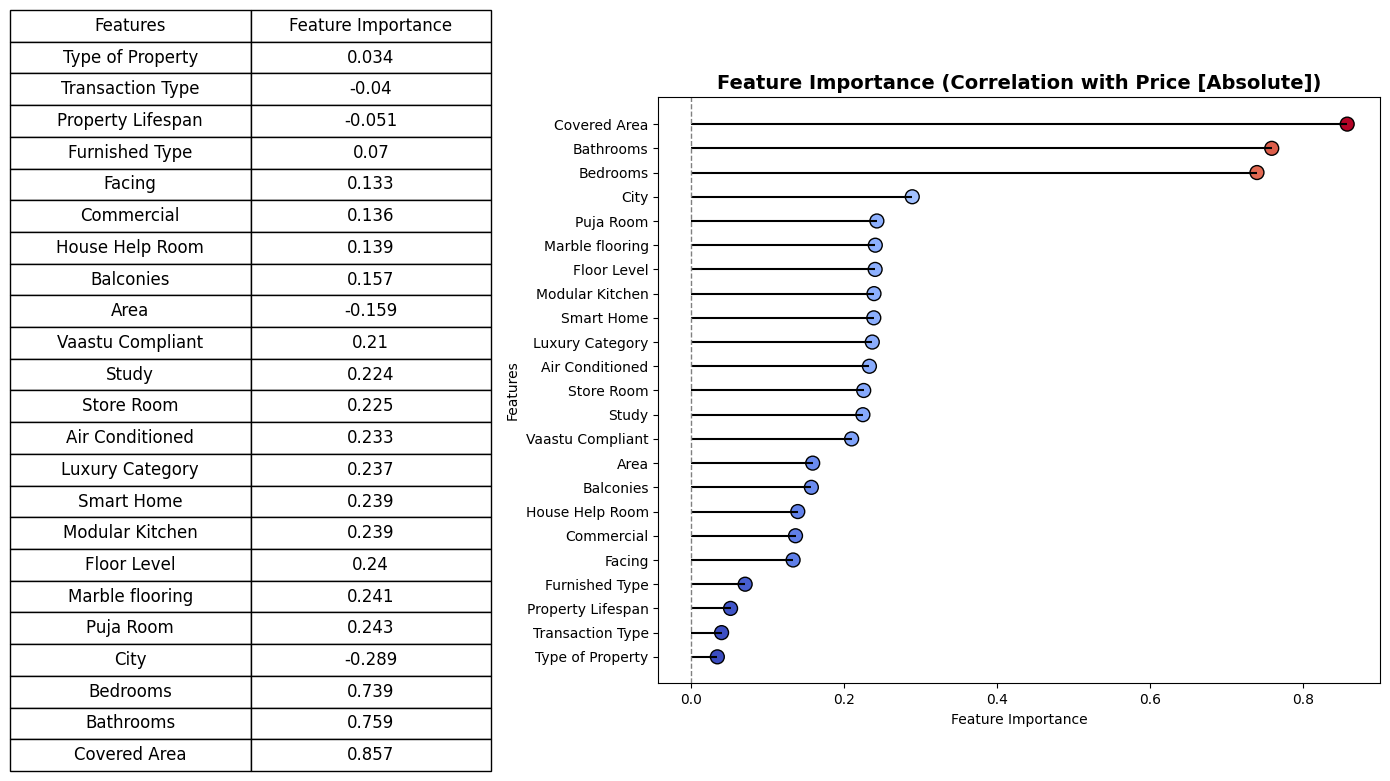

In [111]:
feature_importance_visualization(FI_correlation, 'Correlation with Price [Absolute]')

-----------------

### Strategy 2: Random Forest Feature Importance

In [112]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest regressor on label encoded data
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_label, y_label)

# Extract feature importance scores for label encoded data and make dataframe
FI_random_forest = pd.DataFrame({
    'Features': X_label.columns,
    'FI_Randomforest': rf_regressor.feature_importances_
}).sort_values(by='FI_Randomforest', ascending=False)

# Display
FI_random_forest.style.background_gradient(cmap='coolwarm', subset=['FI_Randomforest'])

,Features,FI_Randomforest
5,Covered Area,0.767533
3,Area,0.082442
2,City,0.031334
7,Bedrooms,0.030031
8,Bathrooms,0.014681
10,Facing,0.012200
12,Property Lifespan,0.012132
9,Balconies,0.012066
6,Furnished Type,0.006941
11,Floor Level,0.006419


Visualize:

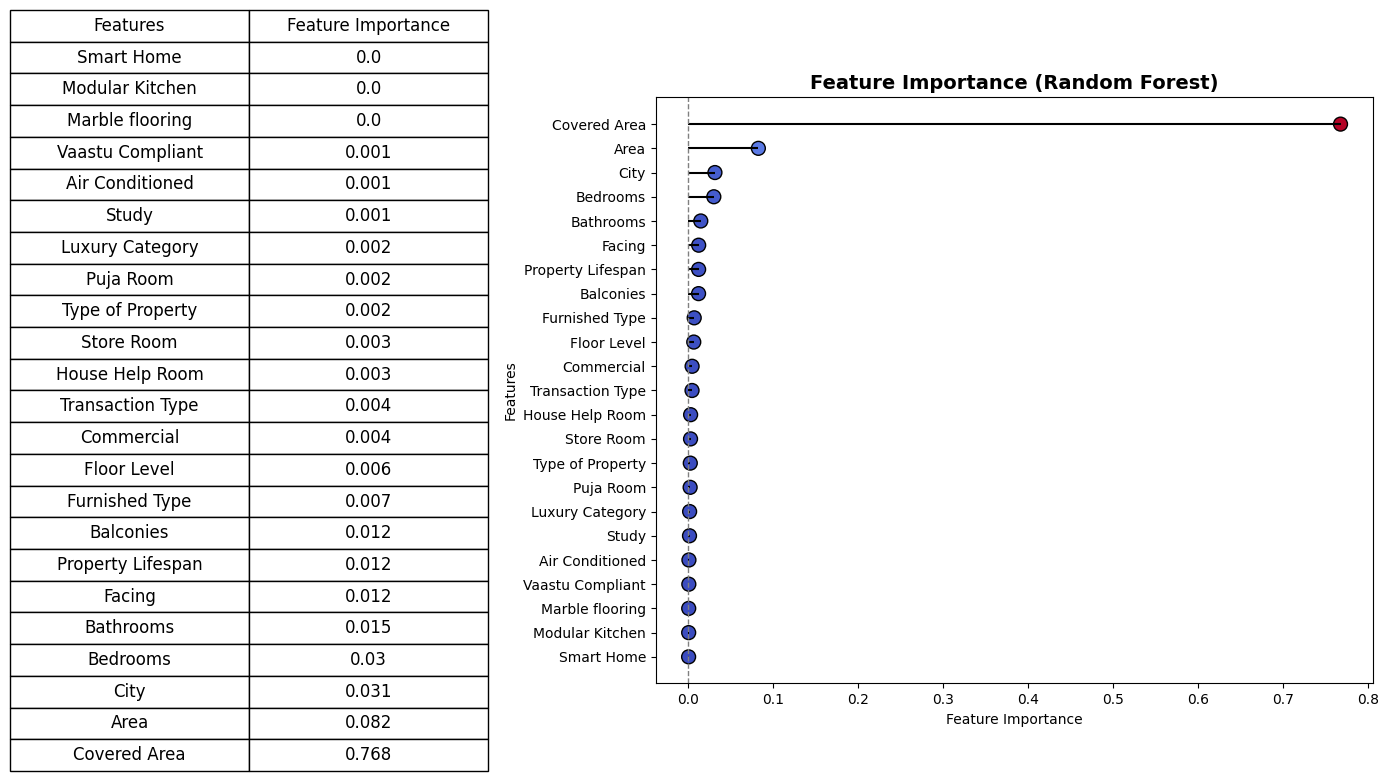

In [113]:
feature_importance_visualization(FI_random_forest, 'Random Forest')

Observation: \
Area and City has now moved to the top of Feature Importance chart. Here we deployed feature importance using tree based models that makes cut in the data rather then depending upon distance metric, hence the results is reliable for all the features.

--------------

### Strategy 3: Gradient Boosting Feature Importance

In [114]:
from sklearn.ensemble import GradientBoostingRegressor

# Train a Gradient Boosting regressor on label encoded data
gb_regressor = GradientBoostingRegressor()
gb_regressor.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
FI_gradient_boosting = pd.DataFrame({
    'Features': X_label.columns,
    'FI_Gradientboosting': gb_regressor.feature_importances_
}).sort_values(by='FI_Gradientboosting', ascending=False)

# Display
FI_gradient_boosting.style.background_gradient(cmap='coolwarm', subset=['FI_Gradientboosting'])

,Features,FI_Gradientboosting
5,Covered Area,0.710886
3,Area,0.091087
8,Bathrooms,0.089131
7,Bedrooms,0.061089
2,City,0.034653
10,Facing,0.006382
9,Balconies,0.002347
12,Property Lifespan,0.001376
11,Floor Level,0.001314
4,Commercial,0.000811


Visualize

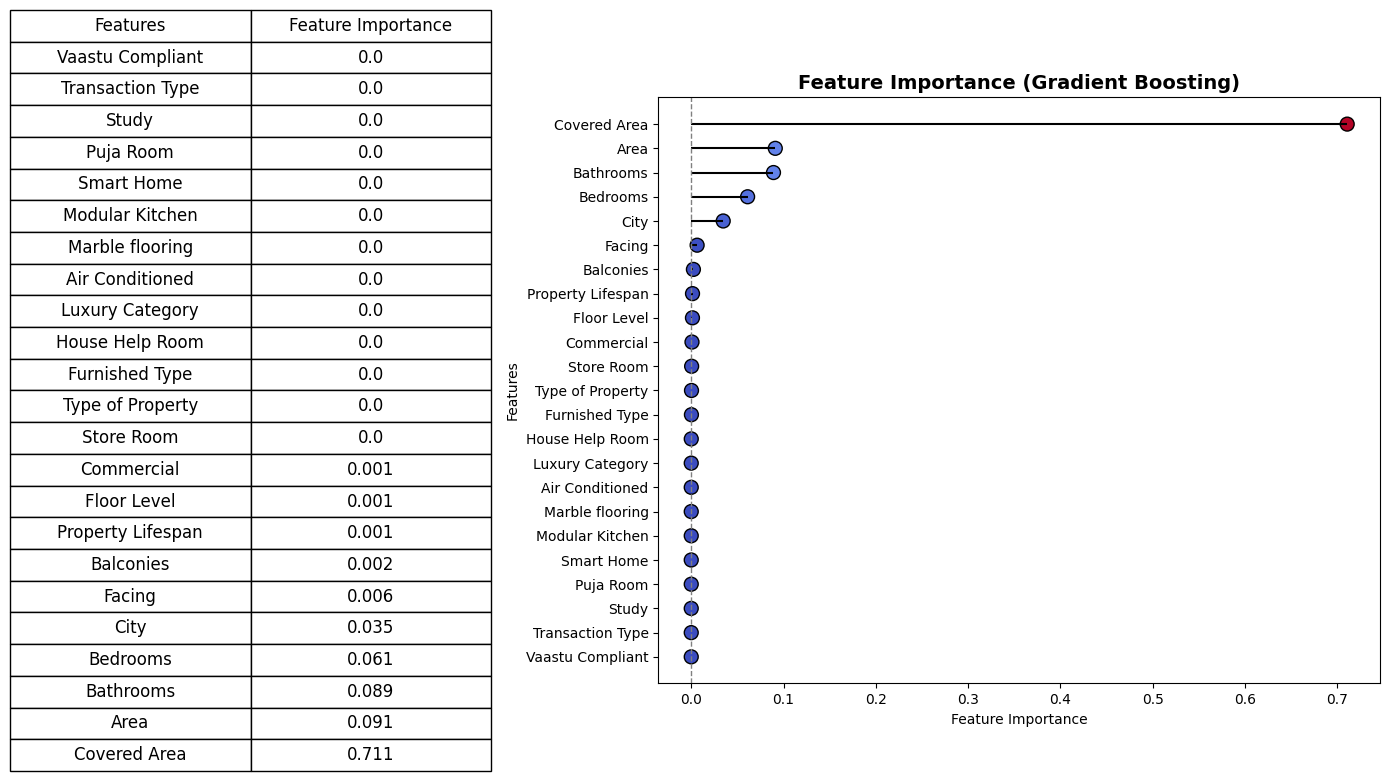

In [115]:
feature_importance_visualization(FI_gradient_boosting, 'Gradient Boosting')

-----------------

### Strategy 4: Permutation Importance

In [116]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(X_label, y_label, test_size=0.2, random_state=42)

# Train a Random Forest regressor on label encoded data
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train_label, y_train_label)

# Calculate Permutation Importance
permutation_importance = permutation_importance(rf_regressor, X_test_label, y_test_label, n_repeats=30, random_state=42)

# Organize results into a DataFrame
FI_permutation_importance = pd.DataFrame({
    'Features': X_label.columns,
    'FI_Permutation': permutation_importance.importances_mean
}).sort_values(by='FI_Permutation', ascending=False)

# Display
FI_permutation_importance.style.background_gradient(cmap='coolwarm', subset=['FI_Permutation'])

,Features,FI_Permutation
5,Covered Area,0.897421
2,City,0.120178
3,Area,0.119820
7,Bedrooms,0.041902
9,Balconies,0.011479
8,Bathrooms,0.007698
10,Facing,0.005042
12,Property Lifespan,0.004246
11,Floor Level,0.003188
6,Furnished Type,0.001844


Visualize

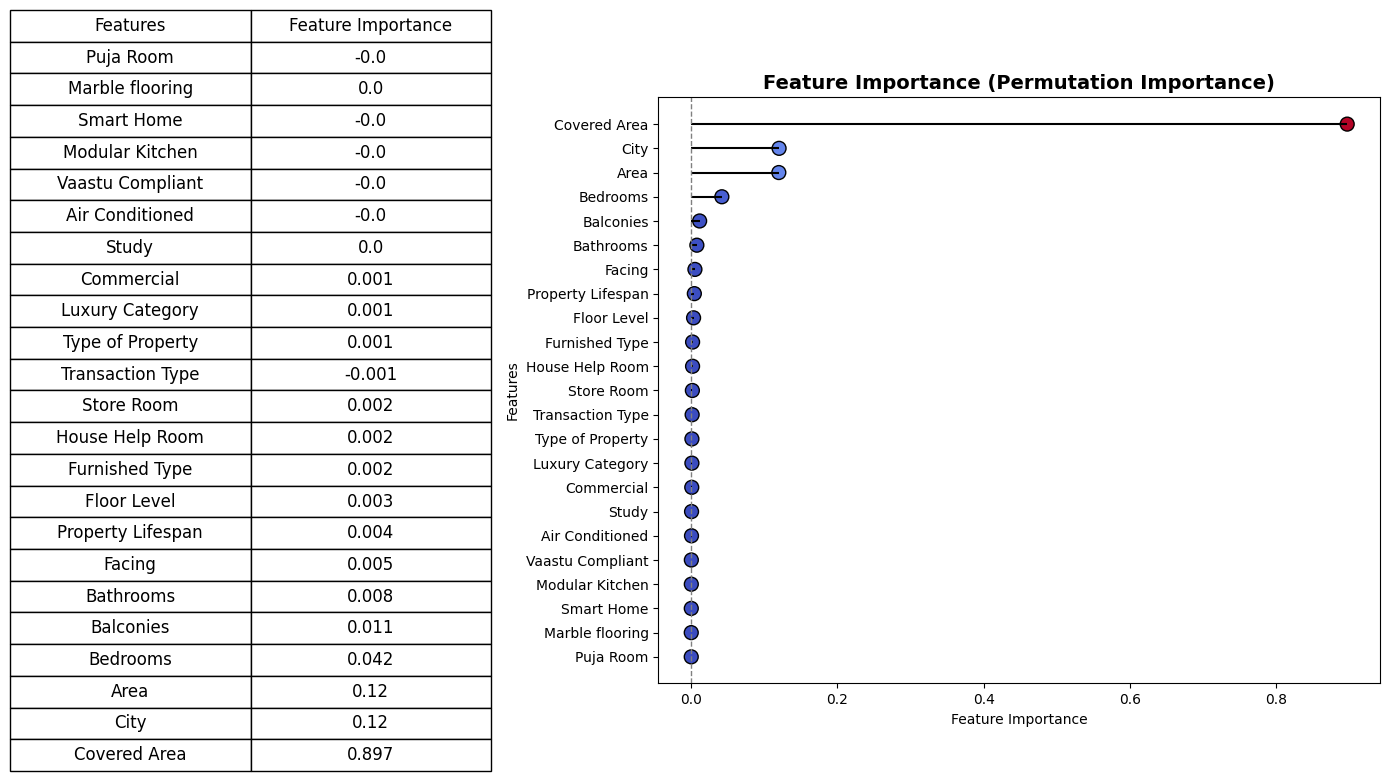

In [117]:
feature_importance_visualization(FI_permutation_importance, 'Permutation Importance')

------------------

### Strategy 5: LASSO Regression
-  Note that here we are using linear model for feature importance. Feature importance results for nominal categorical columns (with no inherent ordering/ ranking) like Area and City using linear model won't be that reliable here because we had ordinal encoded the categorical columns of our dataset which introduced ordering.

-  In previous methods feature importance using tree based models were reliable because they make cut in the data.

-  For feature selection using linear models to be reliable we should have rather done one hot encoding (tree based model based feature selection also works with one hot encoding).

In [118]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_label)

# Train a LASSO regression model
# Using relatively small value for alpha (the regularization strength) for demonstration purposes
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_scaled, y_label)

# Extract the coefficients
FI_LASSO = pd.DataFrame({
    'Features': X_label.columns,
    'FI_Lasso': lasso.coef_
}).sort_values(by='FI_Lasso', ascending=False)

# Display
FI_LASSO.style.background_gradient(cmap='coolwarm', subset=['FI_Lasso'])

,Features,FI_Lasso
5,Covered Area,2.130035
8,Bathrooms,0.463491
10,Facing,0.145104
20,Puja Room,0.124920
15,Store Room,0.121996
4,Commercial,0.111727
12,Property Lifespan,0.080269
17,Marble flooring,0.062244
6,Furnished Type,0.029893
11,Floor Level,0.026688


- As expected both Area and City are down the in the list of Feature Importance as we used a linear model here that depends on distance metric. [Unreliable results for nominal categorical features]

- Feature importance results using linear models for ordinally encoded nominal categorical features is not reliable as linear models uses distance metric and ordinal encoding brings in ordering in nominal categorical features that did not existed inherently.

Visualize:

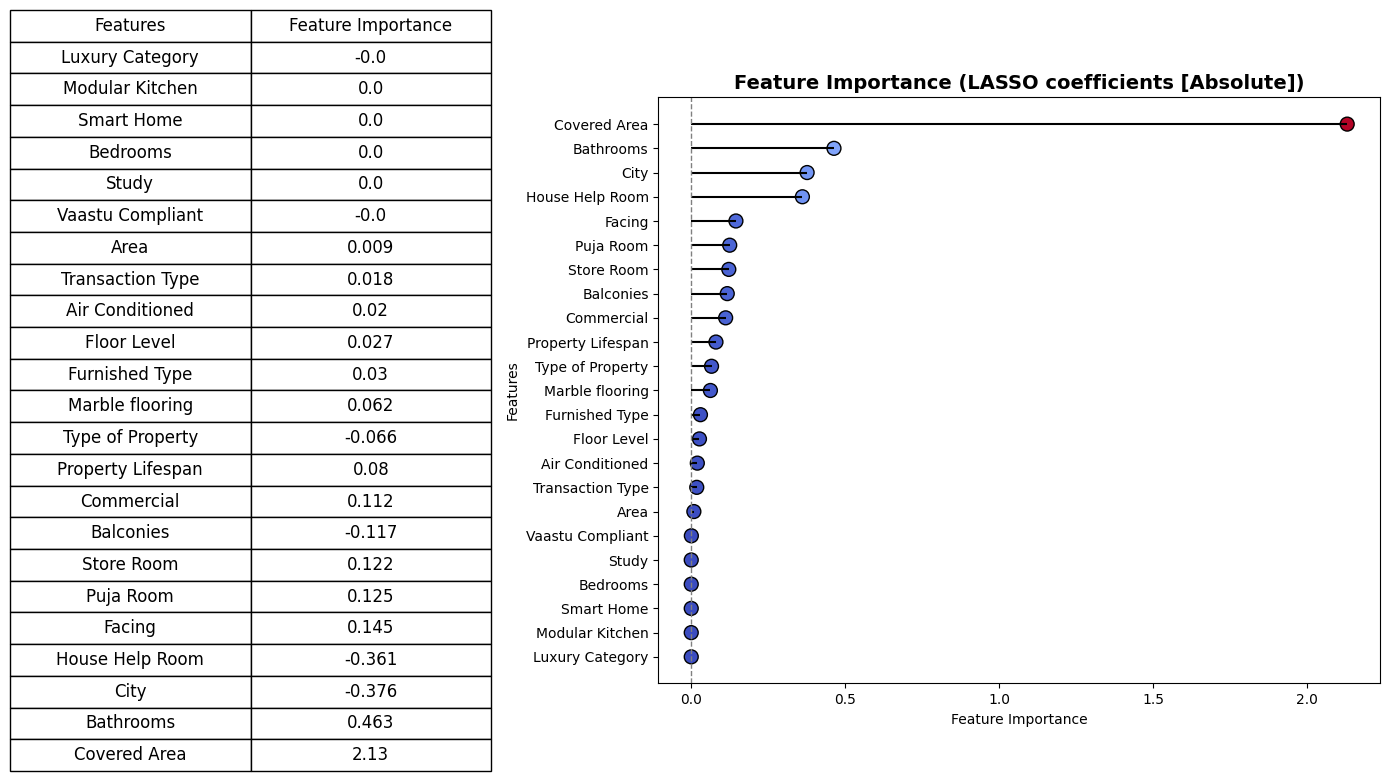

In [119]:
feature_importance_visualization(FI_LASSO, 'LASSO coefficients [Absolute]')

---------------

### Strategy 6: RFE 'Recursive Feature Elimination'

In [120]:
from sklearn.feature_selection import RFE

# Initialize the base estimator
estimator = RandomForestRegressor(random_state=42)

# Apply RFE on the label-encoded training data (Standardization is not required for tree-based models like RandomForest)
selector_label = RFE(estimator, n_features_to_select=X_label.shape[1], step=1)
selector_label = selector_label.fit(X_label, y_label)

# Get the selected features based on RFE
selected_features = X_label.columns[selector_label.support_]

# Extract feature importances for the selected features from the fitted RandomForestRegressor
selected_importances = selector_label.estimator_.feature_importances_

# Organize the results into a DataFrame
FI_RFE = pd.DataFrame({
    'Features': selected_features,
    'FI_RFE': selected_importances
}).sort_values(by='FI_RFE', ascending=False)

# Display
FI_RFE.style.background_gradient(cmap='coolwarm', subset=['FI_RFE'])

,Features,FI_RFE
5,Covered Area,0.767533
3,Area,0.082442
2,City,0.031334
7,Bedrooms,0.030031
8,Bathrooms,0.014681
10,Facing,0.012200
12,Property Lifespan,0.012132
9,Balconies,0.012066
6,Furnished Type,0.006941
11,Floor Level,0.006419


Visualize:

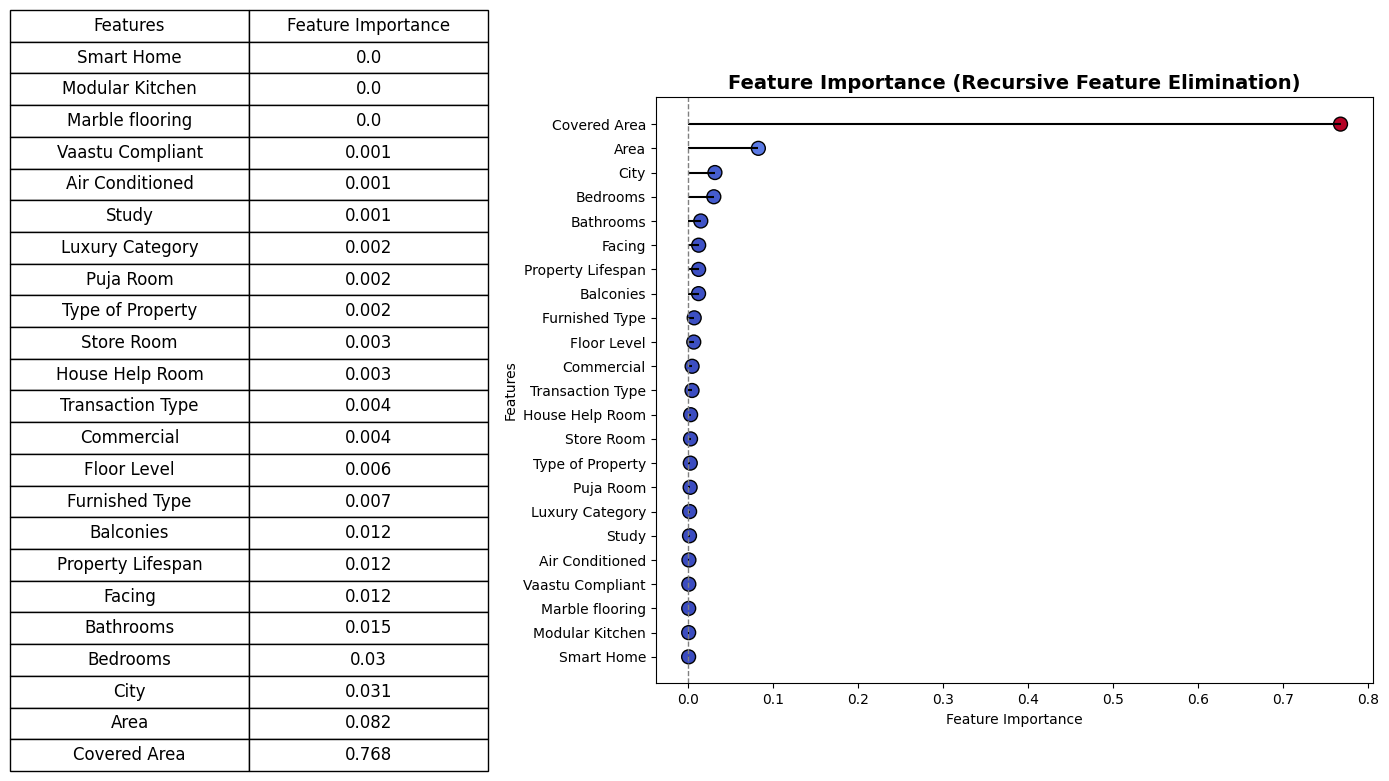

In [121]:
feature_importance_visualization(FI_RFE, 'Recursive Feature Elimination')

--------------

### Strategy 7: Linear Regression Weights

In [122]:
# Train a linear regression model on the label-encoded and standardized training data (more weight means more importance)
from sklearn.linear_model import LinearRegression

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_label)

lin_reg = LinearRegression()
lin_reg.fit(X_scaled, y_label)

# Extract coefficients
FI_LR = pd.DataFrame({
    'Features': X_label.columns,
    'FI_LR': lin_reg.coef_
}).sort_values(by='FI_LR', ascending=False)

# Display
FI_LR.style.background_gradient(cmap='coolwarm', subset=['FI_LR'])

,Features,FI_LR
5,Covered Area,2.134560
17,Marble flooring,1.041774
8,Bathrooms,0.476722
10,Facing,0.151084
20,Puja Room,0.133153
15,Store Room,0.127829
4,Commercial,0.119945
16,Air Conditioned,0.107448
12,Property Lifespan,0.084026
11,Floor Level,0.041729


Visualize:

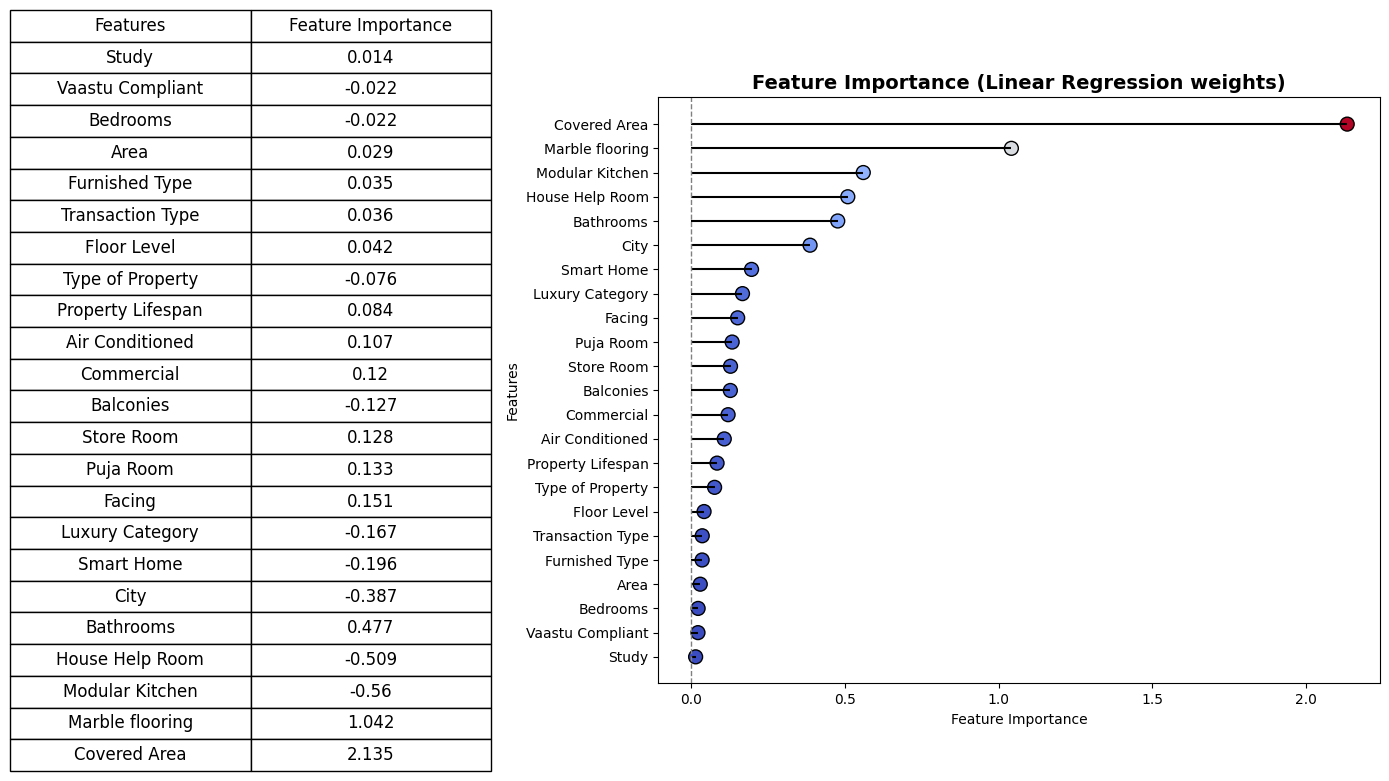

In [123]:
feature_importance_visualization(FI_LR, 'Linear Regression weights')

Results are not reliable for nominal categorical features like Area and City as they were Ordinally encoded and we used a linear model.

------------

### Strategy 8: SHAP

In [124]:
import shap

# Compute SHAP values using the trained Random Forest model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_label, y_label)

explainer = shap.TreeExplainer(rf_regressor)
shap_values = explainer.shap_values(X_label)

# Summing the absolute SHAP values across all samples to get an overall measure of feature importance
shap_sum = np.abs(shap_values).mean(axis=0)

shap_values

array([[-3.62043317e-03,  1.72502693e-04, -7.27715857e-01, ...,
         3.71013592e-03,  1.30541950e-04, -5.25563632e-04],
       [-3.99044622e-03,  2.58278106e-04, -7.42587540e-01, ...,
         3.27259687e-03, -4.89761748e-04, -1.32968236e-04],
       [-4.55698452e-03,  3.95600937e-04, -7.32336498e-01, ...,
         1.28077388e-03, -3.11625070e-04, -1.44486910e-03],
       ...,
       [-3.33579904e-03,  2.00612705e-03,  3.16868110e-01, ...,
        -1.58665762e-02,  1.66079047e-03,  8.38793761e-03],
       [-1.01895606e-02,  2.54619967e-04,  2.61566310e-01, ...,
        -4.86794146e-03, -6.93551906e-03,  7.75767445e-03],
       [-1.73108805e-02,  9.43405396e-04,  2.50855416e-01, ...,
         2.23976338e-03, -2.74858531e-05, -1.81810003e-03]],
      shape=(6280, 23))

In [125]:
FI_SHAP = pd.DataFrame({
    'Features': X_label.columns,
    'FI_SHAP': np.abs(shap_values).mean(axis=0)
}).sort_values(by='FI_SHAP', ascending=False)

# Display
FI_SHAP.style.background_gradient(cmap='coolwarm', subset=['FI_SHAP'])

,Features,FI_SHAP
5,Covered Area,1.474553
2,City,0.375905
3,Area,0.335186
7,Bedrooms,0.263638
8,Bathrooms,0.082694
10,Facing,0.047035
9,Balconies,0.046147
12,Property Lifespan,0.035909
11,Floor Level,0.025880
4,Commercial,0.022999


Visualize:

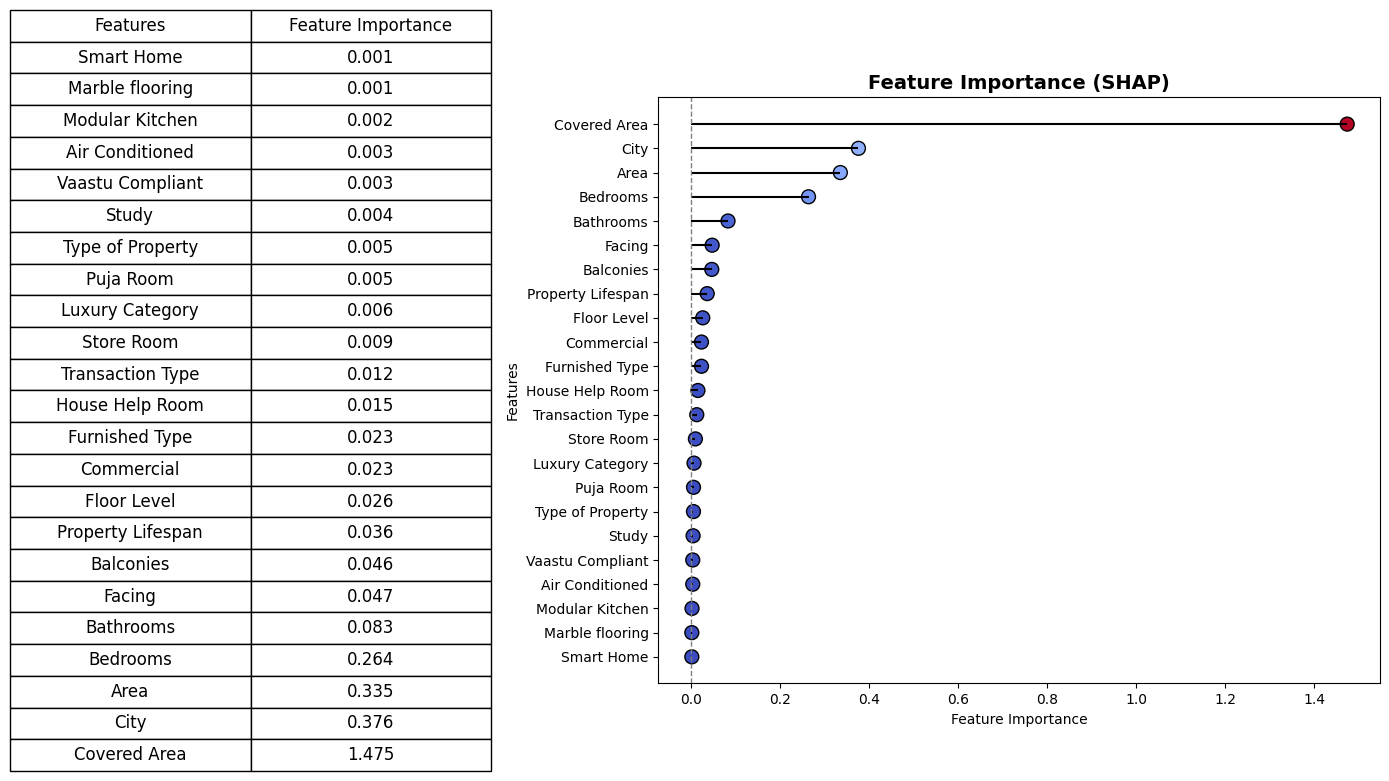

In [126]:
feature_importance_visualization(FI_SHAP, 'SHAP')

--------------

# Summary

### Merge all the individual Feature Importance dataframes

In [127]:
# Merge into single dataframe
final_FI_df = FI_correlation.merge(FI_random_forest,on='Features').merge(FI_gradient_boosting,on='Features').merge(FI_permutation_importance,on='Features').merge(FI_LASSO,on='Features').merge(FI_RFE,on='Features').merge(FI_LR,on='Features').merge(FI_SHAP,on='Features').set_index('Features')
final_FI_df

,FI_corr,FI_Randomforest,FI_Gradientboosting,FI_Permutation,FI_Lasso,FI_RFE,FI_LR,FI_SHAP
Features,,,,,,,,
Covered Area,0.857397,0.767533,0.710886,0.897421,2.130035,0.767533,2.134560,1.474553
Bathrooms,0.758753,0.014681,0.089131,0.007698,0.463491,0.014681,0.476722,0.082694
Bedrooms,0.739477,0.030031,0.061089,0.041902,0.000000,0.030031,-0.022403,0.263638
Puja Room,0.242647,0.002147,0.000000,-0.000005,0.124920,0.002147,0.133153,0.005116
Marble flooring,0.240584,0.000478,0.000000,0.000012,0.062244,0.000478,1.041774,0.001316
Floor Level,0.240367,0.006419,0.001314,0.003188,0.026688,0.006419,0.041729,0.025880
Modular Kitchen,0.238883,0.000431,0.000000,-0.000087,0.000000,0.000431,-0.559819,0.001743
Smart Home,0.238611,0.000366,0.000000,-0.000056,0.000000,0.000366,-0.196217,0.001290
Luxury Category,0.236635,0.001534,0.000000,0.000911,-0.000000,0.001534,-0.166772,0.006275


In [128]:
# Normalize the scores
final_fi_df = final_FI_df.divide(final_FI_df.sum(axis=0), axis=1)
final_fi_df

,FI_corr,FI_Randomforest,FI_Gradientboosting,FI_Permutation,FI_Lasso,FI_RFE,FI_LR,FI_SHAP
Features,,,,,,,,
Covered Area,0.177983,0.767533,0.710886,0.737239,0.879404,0.767533,0.865377,0.526363
Bathrooms,0.157506,0.014681,0.089131,0.006324,0.191356,0.014681,0.193269,0.029519
Bedrooms,0.153504,0.030031,0.061089,0.034423,0.000000,0.030031,-0.009083,0.094110
Puja Room,0.050370,0.002147,0.000000,-0.000004,0.051574,0.002147,0.053982,0.001826
Marble flooring,0.049942,0.000478,0.000000,0.000010,0.025698,0.000478,0.422348,0.000470
Floor Level,0.049897,0.006419,0.001314,0.002619,0.011018,0.006419,0.016918,0.009238
Modular Kitchen,0.049588,0.000431,0.000000,-0.000072,0.000000,0.000431,-0.226958,0.000622
Smart Home,0.049532,0.000366,0.000000,-0.000046,0.000000,0.000366,-0.079549,0.000460
Luxury Category,0.049122,0.001534,0.000000,0.000748,-0.000000,0.001534,-0.067611,0.002240


#### Final Feature Importances:

In [129]:
# Exclude Feature Importance results from Lineal model feature selection techniques
final_FI_df = final_FI_df[['FI_Randomforest','FI_Gradientboosting','FI_Permutation','FI_RFE','FI_SHAP']].mean(axis=1).sort_values(ascending=False).reset_index()
final_FI_df.columns = ['Features', 'Average Feature Importance']
final_FI_df.style.background_gradient(cmap='coolwarm', subset=['Average Feature Importance'])

,Features,Average Feature Importance
0,Covered Area,0.923585
1,Area,0.142195
2,City,0.118681
3,Bedrooms,0.085338
4,Bathrooms,0.041777
5,Balconies,0.016821
6,Facing,0.016572
7,Property Lifespan,0.013159
8,Floor Level,0.008644
9,Furnished Type,0.007783


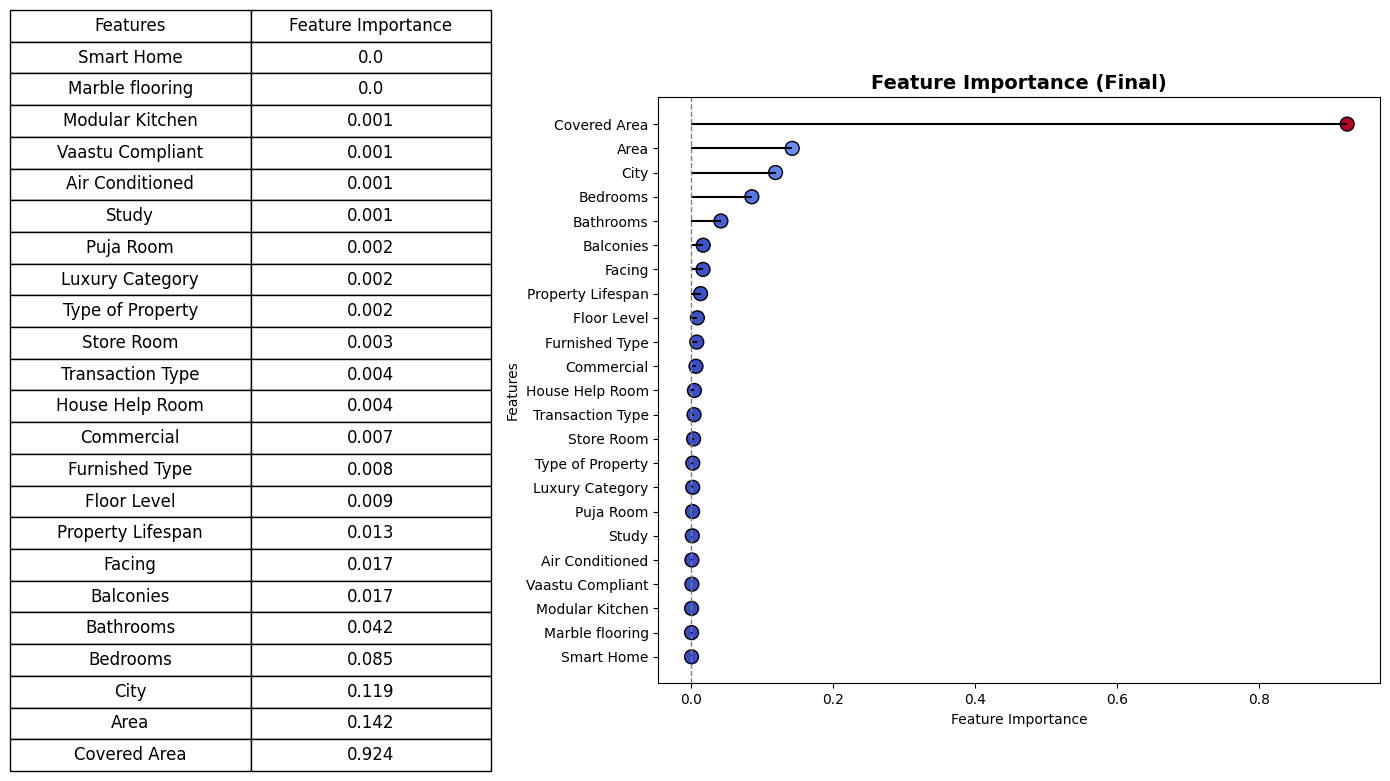

In [130]:
feature_importance_visualization(final_FI_df, 'Final')

7 Features: 'Air Conditioned', 'Marble flooring', 'Modular Kitchen', 'Smart Home', 'Puja Room', 'Study', 'Vaastu Compliant' consistently ranked low across all Feature selection/ importance techniques.

#### Investigation for whether these 7 features are not so important for predicting price of the property:

In [132]:
# Independent features
X_label

,Transaction Type,Type of Property,City,Area,Commercial,Covered Area,Furnished Type,Bedrooms,Bathrooms,Balconies,Facing,Floor Level,Property Lifespan,Vaastu Compliant,House Help Room,Store Room,Air Conditioned,Marble flooring,Modular Kitchen,Smart Home,Puja Room,Study,Luxury Category
0,0.0,0.0,1.0,19.0,1.0,763.571943,0.0,2,2.0,1.0,0.0,2.0,0.0,1,1,1,1,1,1,1,1,1,2.0
1,0.0,0.0,1.0,19.0,0.0,850.000000,0.0,2,2.0,1.0,0.0,2.0,0.0,1,1,1,1,1,1,1,1,1,2.0
2,0.0,0.0,1.0,19.0,0.0,1050.000000,0.0,2,2.0,2.0,0.0,1.0,1.0,1,1,1,1,1,1,1,1,1,2.0
3,0.0,0.0,1.0,19.0,1.0,561.000000,1.0,1,2.0,0.0,0.0,1.0,0.0,1,1,1,1,1,1,1,1,0,2.0
4,0.0,0.0,1.0,19.0,0.0,1067.000000,0.0,2,2.0,0.0,2.0,2.0,0.0,1,1,1,1,1,1,1,1,1,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6275,0.0,0.0,0.0,1.0,1.0,786.279092,0.0,2,2.0,0.0,0.0,1.0,0.0,0,0,0,0,0,0,0,0,0,0.0
6276,0.0,0.0,0.0,1.0,1.0,539.551316,0.0,1,2.0,0.0,2.0,1.0,0.0,0,0,0,0,0,0,0,0,0,0.0
6277,0.0,0.0,0.0,1.0,1.0,996.000000,0.0,3,2.0,1.0,1.0,1.0,0.0,0,0,0,0,0,0,0,0,0,0.0
6278,0.0,0.0,0.0,1.0,1.0,891.000000,0.0,2,2.0,2.0,0.0,1.0,0.0,0,0,0,0,0,0,0,0,0,0.0


In [133]:
# Dependent feature
y_label

0       0.630000
1       0.540000
2       0.900000
3       0.495000
4       0.657000
          ...   
6275    1.460000
6276    1.100000
6277    2.092263
6278    1.870966
6279    1.850000
Name: Price (Crores), Length: 6280, dtype: float64

In [135]:
# Train a Random Forest regressor with all the 7 features present
from sklearn.model_selection import cross_val_score

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Cross-validation
scores = cross_val_score(rf_regressor, X_label, y_label, cv=5, scoring='r2')

# Average score
print('The average R2-score with all the 7 features inclusive:', round(scores.mean(), 2))

The average R2-score with all the 7 features inclusive: 0.66


In [136]:
# Train a Random Forest regressor excluding the 7 features
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Cross-validation
scores = cross_val_score(rf_regressor, X_label.drop(columns=['Air Conditioned', 'Marble flooring', 'Modular Kitchen', 'Smart Home', 'Puja Room', 'Study', 'Vaastu Compliant']), y_label, cv=5, scoring='r2')

# Average score
print('The average R2-score with the 7 features excluded:', round(scores.mean(), 2))

The average R2-score with the 7 features excluded: 0.66


##### As evident there is not much effect on the model accuracy when these 7 columns are dropped. Therefore, we can drop these 7 columns from the dataset permanently.

In [141]:
# Drop 7 features from the dataframe permanently
training_data.drop(columns=['Air Conditioned', 'Marble flooring', 'Modular Kitchen', 'Smart Home', 'Puja Room', 'Study', 'Vaastu Compliant'], inplace=True)

# Sample
training_data.sample(5)

,Transaction Type,Type of Property,City,Area,Commercial,Covered Area,Furnished Type,Bedrooms,Bathrooms,Balconies,Facing,Floor Level,Property Lifespan,House Help Room,Store Room,Luxury Category,Price (Crores)
4196,New Property,Apartment,Mumbai,Matunga East,N,1562.500000,Semi-Furnished,3,4.0,1.0,East,High rise (> 10),5 to 10 years,1,1,High,5.6000
4467,New Property,Apartment,Mumbai,Mahim West,Y,511.928289,Semi-Furnished,1,2.0,2.0,East,High rise (> 10),New construction,0,0,Basic,1.4500
5772,Resale,Apartment,Mumbai,Andheri West,N,1415.000000,Semi-Furnished,2,2.0,3.0,East,Mid rise (5 to 10),Less than 5 years,1,1,High,3.6500
2930,Resale,Apartment,Mumbai,Santacruz West,N,2000.000000,Furnished,3,4.0,1.0,East,High rise (> 10),Less than 5 years,1,1,High,8.7500
1126,Resale,Apartment,Mumbai,Virar West,N,830.000000,Unfurnished,2,2.0,1.0,East,Mid rise (5 to 10),New construction,0,0,Medium,0.5067


In [142]:
# Export df to a csv file
training_data.to_csv('Output Files//stage_6_property_data.csv', index=False)